In [1]:
#Library yang di butuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import os
!pip install tensorflowjs



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/langit/"

test  train  trainmy_model.h


In [4]:
import pathlib
train_dir = '/content/drive/My Drive/langit/train'

test_dir = '/content/drive/My Drive/langit/test'

train_mendung_dir = os.path.join(train_dir, 'Mendung')
train_cerah_dir = os.path.join(train_dir, 'Cerah')
train_berawan_dir = os.path.join(train_dir, 'Berawan')


test_mendung_dir = os.path.join(test_dir, 'Mendung')
test_cerah_dir = os.path.join(test_dir, 'Cerah')
test_berawan_dir = os.path.join(test_dir, 'Berawan')

print('total training Cerah images :', len(os.listdir(train_cerah_dir)))
print('total training Mendung images :', len(os.listdir(train_mendung_dir)))
print('total training Berawan images :', len(os.listdir(train_berawan_dir)))


print('total test Mendung images :', len(os.listdir(test_mendung_dir)))
print('total test Cerah images :', len(os.listdir(test_cerah_dir)))
print('total test Berawan images :', len(os.listdir(test_berawan_dir)))

total training Cerah images : 512
total training Mendung images : 514
total training Berawan images : 515
total test Mendung images : 124
total test Cerah images : 120
total test Berawan images : 120


*Pre-processing*

In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255)
    

In [6]:
#Pengaplikasiannya

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    color_mode = 'rgb',
                                                    class_mode='categorical',
                                                    batch_size = 32)

test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size = (150, 150),
                                                  color_mode = 'rgb',
                                                  class_mode='categorical',
                                                  batch_size = 32)

Found 1541 images belonging to 3 classes.
Found 363 images belonging to 3 classes.


Membuat Model CNN

In [7]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    ##tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
# training 
history = model.fit (train_generator,
                     epochs = 100,
                     validation_data = test_generator,
                     verbose=1)


Epoch 1/100
49/49 [==============================] - 439s 9s/step - loss: 1.0438 - accuracy: 0.4036 - val_loss: 0.8502 - val_accuracy: 0.6860
Epoch 2/100
49/49 [==============================] - 103s 2s/step - loss: 0.8511 - accuracy: 0.6262 - val_loss: 0.6771 - val_accuracy: 0.7107
Epoch 3/100
49/49 [==============================] - 102s 2s/step - loss: 0.7378 - accuracy: 0.6729 - val_loss: 0.7807 - val_accuracy: 0.6556
Epoch 4/100
49/49 [==============================] - 101s 2s/step - loss: 0.7224 - accuracy: 0.6794 - val_loss: 0.5794 - val_accuracy: 0.7410
Epoch 5/100
49/49 [==============================] - 101s 2s/step - loss: 0.6572 - accuracy: 0.7112 - val_loss: 0.7972 - val_accuracy: 0.6116
Epoch 6/100
49/49 [==============================] - 101s 2s/step - loss: 0.6068 - accuracy: 0.7346 - val_loss: 0.5139 - val_accuracy: 0.7466
Epoch 7/100
49/49 [==============================] - 102s 2s/step - loss: 0.5897 - accuracy: 0.7385 - val_loss: 0.5036 - val_accuracy: 0.7686
Epoch 

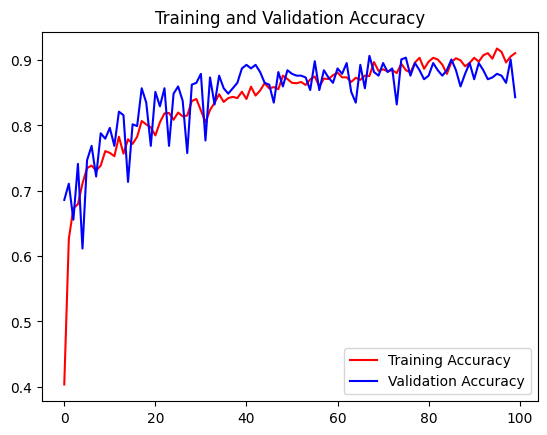

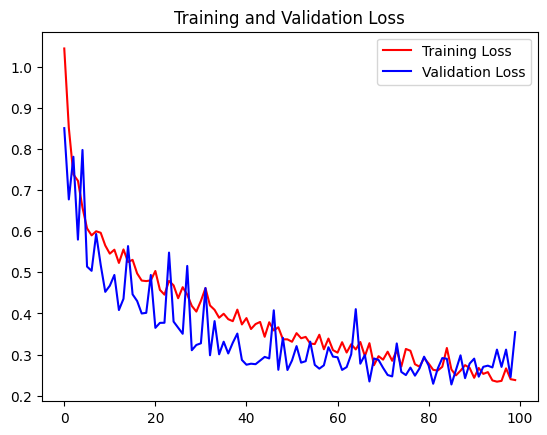

In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()
     

Saving mendung.jpg to mendung.jpg
1/1 [==============================] - 0s 27ms/step
mendung.jpg
Ini adalah cuaca Berawan


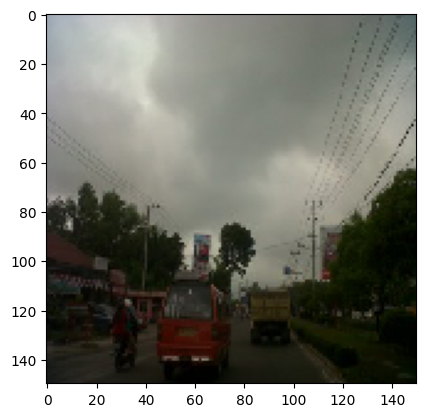

In [20]:
# Prediksi dengan data test
import numpy as np
from keras.preprocessing import image
from google.colab import  files


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('Ini adalah cuaca', class_list[j])
      break

In [21]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from tensorflow.keras.models import load_model
save_model = "/content/drive/MyDrive/trainmy_modelaug.hdf5"
model.save(save_model)

In [23]:
from google.colab import files
files.download('/content/drive/MyDrive/trainmy_modelaug.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
!tensorflowjs_converter --input_format=keras {save_model} ./

2023-05-28 08:19:05.969958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from google.colab import files
files.download('/content/model.json')